In [1]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import json

In [2]:
# get the labels in any of the results
y_labels = list(json.load(open("eval_results_bytetrack_conf_0109/metrics_bytetrack_conf_01.json")).keys())

#remove unwanted labels
for unwanted_label in ["label_metrics", "cfg", "meta"]: # we exclude those because they are not scalars
    try:
        y_labels.remove(unwanted_label)
    except:
        pass

In [12]:
# uncomment any of those paths to obtain the corresponing results
# RESULTS_PATH = "eval_results_bytetrack_conf_0109" # megvii results using conf 0.1 - 0.9
# RESULTS_PATH = "eval_results_bytetrack_bevformer_conf_0109" # bevformer results using conf 0.1 - 0.9
# RESULTS_PATH = "eval_results_bytetrack_kalman_var" # megvii results using variations of alpha and R update
# RESULTS_PATH = "eval_results_bytetrack_hung_0109" # megvii results using hungarian-thresh 0.1-0.9

In [13]:
# collect all the data in an array
if RESULTS_PATH == "eval_results_bytetrack_hung_0109" or RESULTS_PATH == "eval_results_bytetrack_bevformer_conf_0109":
    res = np.zeros((18, 9), float)
    for i, folder in enumerate(os.listdir(RESULTS_PATH)):
        # hung_thresh = float(folder.split("_")[-1])
        for file in os.listdir(os.path.join(RESULTS_PATH, folder)):
            if file.endswith("summary.json"):
                for j, key in enumerate(y_labels):
                    results = json.load(open(os.path.join(RESULTS_PATH, folder, file)))
                    res[j, i] = results[key]
                    # print("AMOTA: ", results["amota"])

elif RESULTS_PATH == "eval_results_bytetrack_kalman_var":
    res = np.zeros((18, 4), float)
    for i, file in enumerate(os.listdir(os.path.join(RESULTS_PATH))):
        if file.endswith(".json"):
            for j, key in enumerate(y_labels):
                results = json.load(open(os.path.join(RESULTS_PATH, file)))
                res[j, i] = results[key]

elif RESULTS_PATH == "eval_results_bytetrack_conf_0109":
    res = np.zeros((18, 9), float)
    for i, file in enumerate(os.listdir(os.path.join(RESULTS_PATH))):
        if file.endswith(".json"):
            for j, key in enumerate(y_labels):
                results = json.load(open(os.path.join(RESULTS_PATH, file)))
                res[j, i] = results[key]

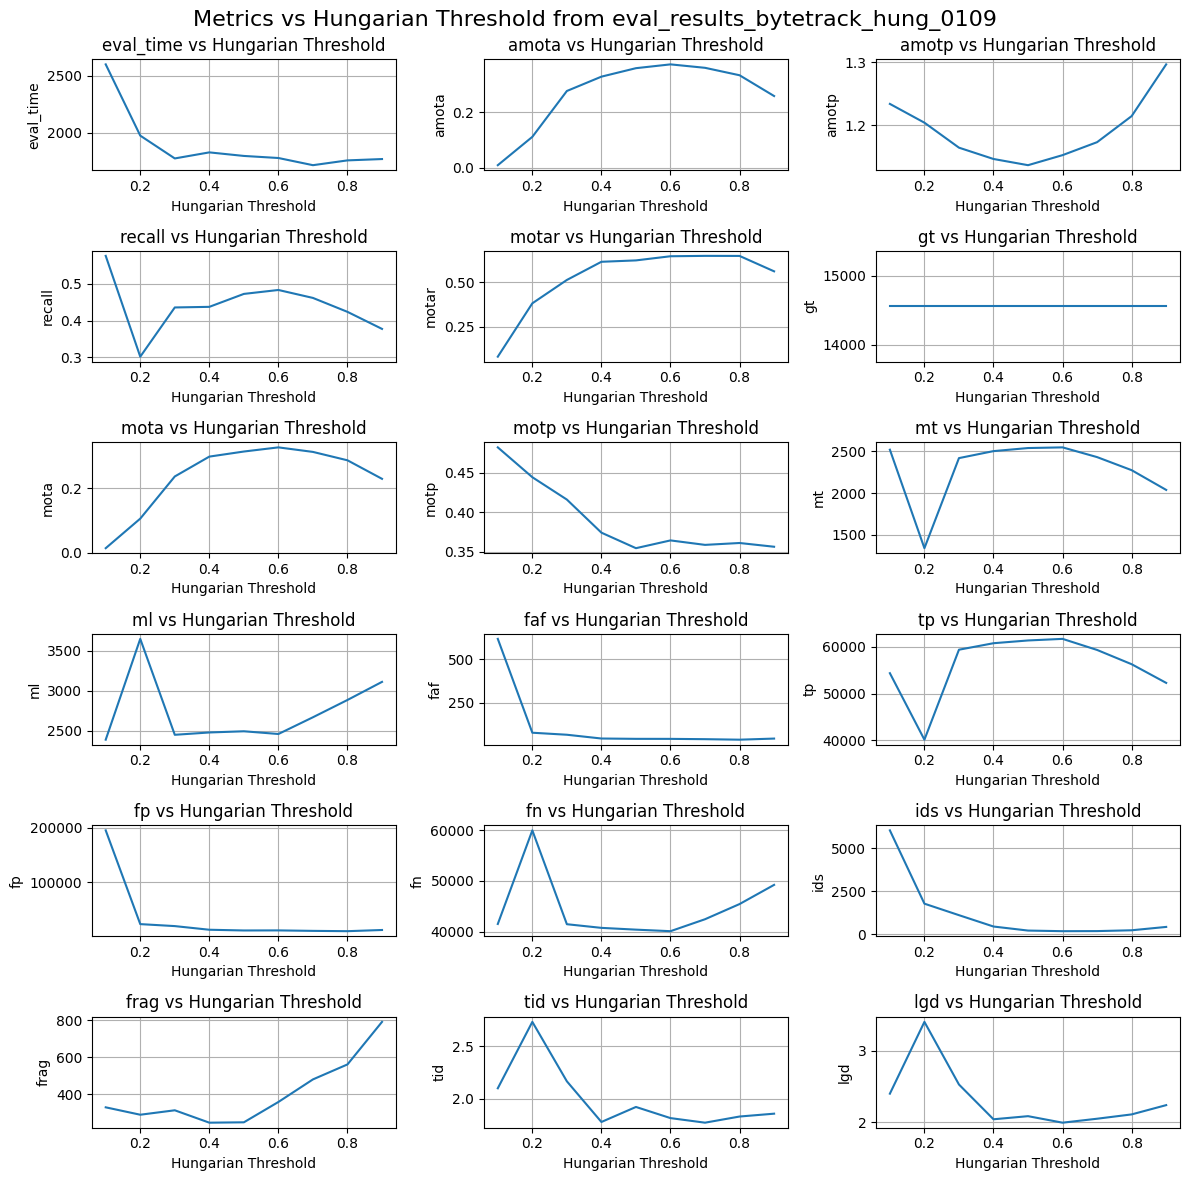

In [14]:
if RESULTS_PATH != "eval_results_bytetrack_kalman_var":
    # Assuming you have 21 arrays for y and one common array for x
    x = np.linspace(0.1, 0.9, 9)  # Common x array

    if RESULTS_PATH == "eval_results_bytetrack_conf_0109" or RESULTS_PATH == "eval_results_bytetrack_bevformer_conf_0109":
        xlabel = "Confidence Threshold"
    elif RESULTS_PATH == "eval_results_bytetrack_hung_0109":
        xlabel = "Hungarian Threshold"

    # Create a figure and subplots
    fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 12))

    fig.suptitle(f"Metrics vs {xlabel} from {RESULTS_PATH}", fontsize=16)

    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    # Plotting the graphs
    for i, label in enumerate(y_labels):
        y = res[i, :]
        ax = axes[i]
        ax.plot(x, y)  # Plotting y against x

        # Customize the plot
        ax.set_xlabel(xlabel)
        ax.set_ylabel(label)
        ax.set_title(f"{label} vs {xlabel}")
        ax.grid(True)
        
        # Add any additional customizations or calculations specific to each graph
        
    # Adjust the spacing between subplots
    fig.tight_layout()

    # Show the plot
    plt.show()

elif RESULTS_PATH == "eval_results_bytetrack_kalman_var":
    # Assuming you have 18 arrays for y and one common list of strings for x labels
    x_labels = ["75","100","125","no R update"]  # List of strings for x-axis labels

    # Create a figure and subplots
    fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 12))

    # Flatten the axes array for easier indexing
    axes = axes.flatten()
    xlabel = "alpha"

    fig.suptitle(f"Metrics vs {xlabel} from {RESULTS_PATH}", fontsize=16)

    # Plotting the bar charts
    for i, label in enumerate(y_labels):
        
        y = res[i, :]
        ax = axes[i]
        x = np.arange(len(x_labels))  # Generate x values as integers from 0 to (number of labels - 1)
        ax.bar(x, y)  # Plotting bar chart

        # Customize the plot
        ax.set_xticks(x)  # Set x-ticks positions
        ax.set_xticklabels(x_labels)  # Set x-tick labels
        ax.set_ylabel('Y')  # Set y-label
        ax.set_title(f"{label} vs {xlabel}")
        ax.set_ylim(ymin=4*y[0]/5)
        ax.grid(True)

    # Adjust the spacing between subplots
    fig.tight_layout()

    # Show the plot
    plt.show()
